# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/investor-relations). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

Instructions

This section divides the instructions for this Challenge into four steps and an optional fifth step, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

* Step 5 (optional): Forecast revenue by using time series models

The following subsections detail these steps.

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

2. Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

3. Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?

## Step 5 (Optional): Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

1. Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

2. Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

3. Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.


## Install and import the required libraries and dependencies

In [17]:
# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
import pathlib as Path
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

In [5]:
# Pull down the CSV files and load into a Dataframe
# Set the "Date" column as the Datetime Index.

data_file = ("google_hourly_search_trends.csv")

df_mercado_trends = pd.read_csv(data_file,
                                index_col="Date",
                                infer_datetime_format=True,
                                parse_dates=True
                                )

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head(),df_mercado_trends.tail())


Search Trends
Date                              
2016-06-01 00:00:00             97
2016-06-01 01:00:00             92
2016-06-01 02:00:00             76
2016-06-01 03:00:00             60
2016-06-01 04:00:00             38

Search Trends
Date                              
2020-09-07 20:00:00             71
2020-09-07 21:00:00             83
2020-09-07 22:00:00             96
2020-09-07 23:00:00             97
2020-09-08 00:00:00             96

In [6]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [10]:

# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends.loc['2020-05-01' : '2020-05-31']

# Use hvPlot to visualize the data for May 2020
df_may_2020.hvplot(title="Search Trends - May 2020")


:Curve   [Date]   (Search Trends)

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [8]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020['Search Trends'].sum()

# View the traffic_may_2020 value
traffic_may_2020


38181

In [11]:
# Calcluate the monhtly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby(by=[df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

# View the median_monthly_traffic value
median_monthly_traffic


Search Trends    35172.5
dtype: float64

In [12]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020 / median_monthly_traffic


Search Trends    1.085536
dtype: float64

##### Answer the following question: 

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** From that analysis, yes Google search traffic did have an increase during May 2020 compared to the median results by approximately 8.5%

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

2. Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

3. Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

In [15]:

# Group the hourly search data to plot (use hvPlot) the average traffic by the day of week 
df_hourly_average = df_mercado_trends.groupby(df_mercado_trends.index.day_of_year).mean()

df_hourly_average.head()


Search Trends
Date               
1         24.197917
2         49.541667
3         53.958333
4         51.947917
5         48.791667

#### Step 2: Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

In [18]:

# Use hvPlot to visualize the hour of the day and day of week search traffic as a heatmap.

#df_hourly_average.hvplot.heatmap(
#    x="index.hour",
#    y="index.dayofweek",
#    C="Search Trends",
#    cmap='reds').aggregate(function=np.mean)

df_mercado_trends.hvplot.heatmap(x='index.hour',
                                 y='index.dayofweek',
                                 C='Search Trends',
                                 cmap='reds').aggregate(function=np.mean)

:HeatMap   [index.hour,index.dayofweek]   (Search Trends)

##### Answer the following question:

**Question:** Does any day-of-week effect that you observe concentrate in just a few hours of that day?

**Answer:** It shows that it gets more Google Searches over night (hours 22:00-03:00) than any other time and doesn't get many searches early morning.

#### Step 3: Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

In [20]:

# Group the hourly search data to plot (use hvPlot) the average traffic by the week of the year
df_mercado_trends.groupby(df_mercado_trends.index.weekofyear).mean().hvplot(title="Mercado Searches by Week")

D:\Anaconda\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


:Curve   [Date]   (Search Trends)

##### Answer the following question:

**Question:** Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

**Answer:** The trend is generally increasing, it does decrease from week 40 to week 41 and then a major drop off from week 51 to 52 but in those middle weeks the trend is generally increasing.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [24]:
# Upload CSV file for stock price data into dataframe
stock_price_csv_path = ("mercado_stock_price.csv")

df_mercado_stock = pd.read_csv(stock_price_csv_path,
                                index_col="date",
                                infer_datetime_format=True,
                                parse_dates=True
                                )

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head(),df_mercado_stock.tail())


close
date                       
2015-01-02 09:00:00  127.67
2015-01-02 10:00:00  125.44
2015-01-02 11:00:00  125.57
2015-01-02 12:00:00  125.40
2015-01-02 13:00:00  125.17

close
date                         
2020-07-31 11:00:00  1105.780
2020-07-31 12:00:00  1087.925
2020-07-31 13:00:00  1095.800
2020-07-31 14:00:00  1110.650
2020-07-31 15:00:00  1122.510

In [27]:
# Use hvPlot to visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.hvplot(title="Mercado Libre Closing Price from Jan 2015 to July 2020")


:Curve   [date]   (close)

In [28]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.head(),mercado_stock_trends_df.tail())


close  Search Trends
2016-06-01 09:00:00  135.16            6.0
2016-06-01 10:00:00  136.63           12.0
2016-06-01 11:00:00  136.56           22.0
2016-06-01 12:00:00  136.42           33.0
2016-06-01 13:00:00  136.10           40.0

close  Search Trends
2020-07-31 11:00:00  1105.780           20.0
2020-07-31 12:00:00  1087.925           32.0
2020-07-31 13:00:00  1095.800           41.0
2020-07-31 14:00:00  1110.650           47.0
2020-07-31 15:00:00  1122.510           53.0

#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [39]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
first_half_2020 = mercado_stock_trends_df.loc["2020-01-01":"2020-06-30"]

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head(),first_half_2020.tail())

close  Search Trends  Lagged Search Trends  \
2020-01-02 09:00:00  601.085            9.0                  41.0   
2020-01-02 10:00:00  601.290           14.0                   9.0   
2020-01-02 11:00:00  615.410           25.0                  14.0   
2020-01-02 12:00:00  611.400           37.0                  25.0   
2020-01-02 13:00:00  611.830           50.0                  37.0   

                     Stock Volatility  Hourly Stock Return  
2020-01-02 09:00:00         13.598454             0.049875  
2020-01-02 10:00:00         15.758178             0.000341  
2020-01-02 11:00:00         17.995004             0.023483  
2020-01-02 12:00:00          7.241739            -0.006516  
2020-01-02 13:00:00          6.067396             0.000703

close  Search Trends  Lagged Search Trends  \
2020-06-30 11:00:00  976.17           17.0                  11.0   
2020-06-30 12:00:00  977.50           27.0                  17.0   
2020-06-30 13:00:00  973.23           37.0                  27.0   
2020-06-30 14:00:00  976.50           45.0                  37.0   
2020-06-30 15:00:00  984.93           51.0                  45.0   

                     Stock Volatility  Hourly Stock Return  
2020-06-30 11:00:00          3.382228            -0.002656  
2020-06-30 12:00:00          3.528469             0.001362  
2020-06-30 13:00:00          2.375393            -0.004368  
2020-06-30 14:00:00          1.835919             0.003360  
2020-06-30 15:00:00          4.942044             0.008633

In [30]:
# Use hvPlot to visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `hvplot(shared_axes=False, subplots=True).cols(1)`
first_half_2020.hvplot(shared_axes=False, subplots=True).cols(1)

:NdLayout   [Variable]
   :Curve   [index]   (value)

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Yes it does, you can see that the searches are higher when the stock price is higher and are lower when the stock price is lower. There is also huge jumps in both at the same time, for example on the 5th of May 2020.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [31]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1)


In [32]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['close'].rolling(window=4).std()

In [35]:
# Use hvPlot to visualize the stock volatility
mercado_stock_trends_df['Stock Volatility'].hvplot(title="Mercado Libre Stock Volatility based on 4 hour rolling standard deviation")

:Curve   [index]   (Stock Volatility)

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [34]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()

In [36]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head(),mercado_stock_trends_df.tail())

close  Search Trends  Lagged Search Trends  \
2016-06-01 09:00:00  135.16            6.0                   NaN   
2016-06-01 10:00:00  136.63           12.0                   6.0   
2016-06-01 11:00:00  136.56           22.0                  12.0   
2016-06-01 12:00:00  136.42           33.0                  22.0   
2016-06-01 13:00:00  136.10           40.0                  33.0   

                     Stock Volatility  Hourly Stock Return  
2016-06-01 09:00:00               NaN                  NaN  
2016-06-01 10:00:00               NaN             0.010876  
2016-06-01 11:00:00               NaN            -0.000512  
2016-06-01 12:00:00          0.693848            -0.001025  
2016-06-01 13:00:00          0.235142            -0.002346

close  Search Trends  Lagged Search Trends  \
2020-07-31 11:00:00  1105.780           20.0                  11.0   
2020-07-31 12:00:00  1087.925           32.0                  20.0   
2020-07-31 13:00:00  1095.800           41.0                  32.0   
2020-07-31 14:00:00  1110.650           47.0                  41.0   
2020-07-31 15:00:00  1122.510           53.0                  47.0   

                     Stock Volatility  Hourly Stock Return  
2020-07-31 11:00:00          7.495900             0.006380  
2020-07-31 12:00:00         12.188462            -0.016147  
2020-07-31 13:00:00          7.393646             0.007239  
2020-07-31 14:00:00         10.169735             0.013552  
2020-07-31 15:00:00         15.408790             0.010678

#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [38]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()


Stock Volatility  Lagged Search Trends  \
Stock Volatility              1.000000             -0.118945   
Lagged Search Trends         -0.118945              1.000000   
Hourly Stock Return           0.046723              0.017929   

                      Hourly Stock Return  
Stock Volatility                 0.046723  
Lagged Search Trends             0.017929  
Hourly Stock Return              1.000000

##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** No there is not, both relationship coefficients are close to 0 displaying that there is not really a relationship between the Lagged Search Trends and Stock Volatility or Hourly Stock Return.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [40]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head(),mercado_prophet_df.tail())


ds   y
0 2016-06-01 00:00:00  97
1 2016-06-01 01:00:00  92
2 2016-06-01 02:00:00  76
3 2016-06-01 03:00:00  60
4 2016-06-01 04:00:00  38

ds   y
37101 2020-09-07 20:00:00  71
37102 2020-09-07 21:00:00  83
37103 2020-09-07 22:00:00  96
37104 2020-09-07 23:00:00  97
37105 2020-09-08 00:00:00  96

In [41]:
# Call the Prophet function, store as an object
model_mercado_trends = Prophet()

In [42]:
# Fit the time-series model.
model_mercado_trends.fit(mercado_prophet_df)

16:44:20 - cmdstanpy - INFO - Chain [1] start processing
16:44:46 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_trends.head(),future_mercado_trends.tail())

ds
0 2016-06-01 00:00:00
1 2016-06-01 01:00:00
2 2016-06-01 02:00:00
3 2016-06-01 03:00:00
4 2016-06-01 04:00:00

ds
39101 2020-11-30 04:00:00
39102 2020-11-30 05:00:00
39103 2020-11-30 06:00:00
39104 2020-11-30 07:00:00
39105 2020-11-30 08:00:00

In [45]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  \
0 2016-06-01 00:00:00  44.242750   81.090370   98.161425    44.242750   
1 2016-06-01 01:00:00  44.243758   78.096483   94.206698    44.243758   
2 2016-06-01 02:00:00  44.244766   67.301394   84.208583    44.244766   
3 2016-06-01 03:00:00  44.245774   51.954202   68.976363    44.245774   
4 2016-06-01 04:00:00  44.246782   34.994225   51.505421    44.246782   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    44.242750       45.345640             45.345640             45.345640   
1    44.243758       41.791404             41.791404             41.791404   
2    44.244766       31.467889             31.467889             31.467889   
3    44.245774       16.200656             16.200656             16.200656   
4    44.246782       -0.914226             -0.914226             -0.914226   

       daily  ...    weekly  weekly_lower  weekly_upper    yearly  \
0  41.452723  ...  1.860255      1.860255      1.860255  2.032663   
1  37.943516  ...  1.810167      1.810167      1.810167  2.037722   
2  27.656551  ...  1.768588      1.768588      1.768588  2.042750   
3  12.417299  ...  1.735611      1.735611      1.735611  2.047746   
4  -4.678128  ...  1.711192      1.711192      1.711192  2.052710   

   yearly_lower  yearly_upper  multiplicative_terms  \
0      2.032663      2.032663                   0.0   
1      2.037722      2.037722                   0.0   
2      2.042750      2.042750                   0.0   
3      2.047746      2.047746                   0.0   
4      2.052710      2.052710                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                         0.0                         0.0  89.588390  
1                         0.0                         0.0  86.035162  
2                         0.0                         0.0  75.712655  
3                         0.0                         0.0  60.446430  
4                         0.0                         0.0  43.332556  

[5 rows x 22 columns]

#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

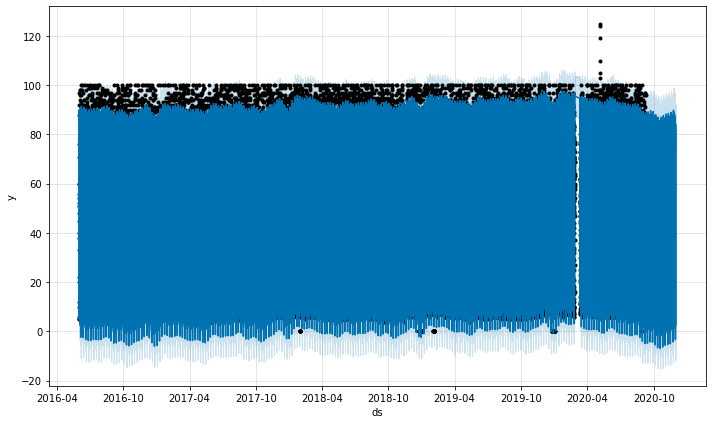

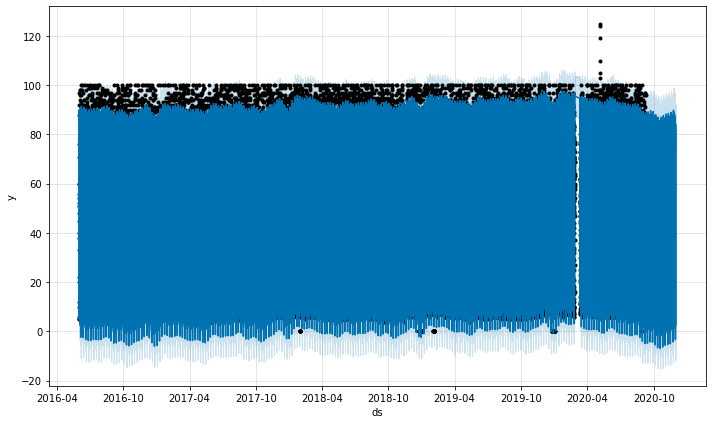

In [46]:
# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends)

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** The near future looks like the popularity of MercadoLibre will decrease before making a bit of a recovery towards the end of the 80 day prediction.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [47]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()


yhat  yhat_lower  yhat_upper
ds                                                    
2016-06-01 00:00:00  89.588390   81.090370   98.161425
2016-06-01 01:00:00  86.035162   78.096483   94.206698
2016-06-01 02:00:00  75.712655   67.301394   84.208583
2016-06-01 03:00:00  60.446430   51.954202   68.976363
2016-06-01 04:00:00  43.332556   34.994225   51.505421

Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

In [48]:
# From the forecast_mercado_trends DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].hvplot(title="Mercado Forecast with 95% confidence invtervals on lower and upper ends of the forecast")

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

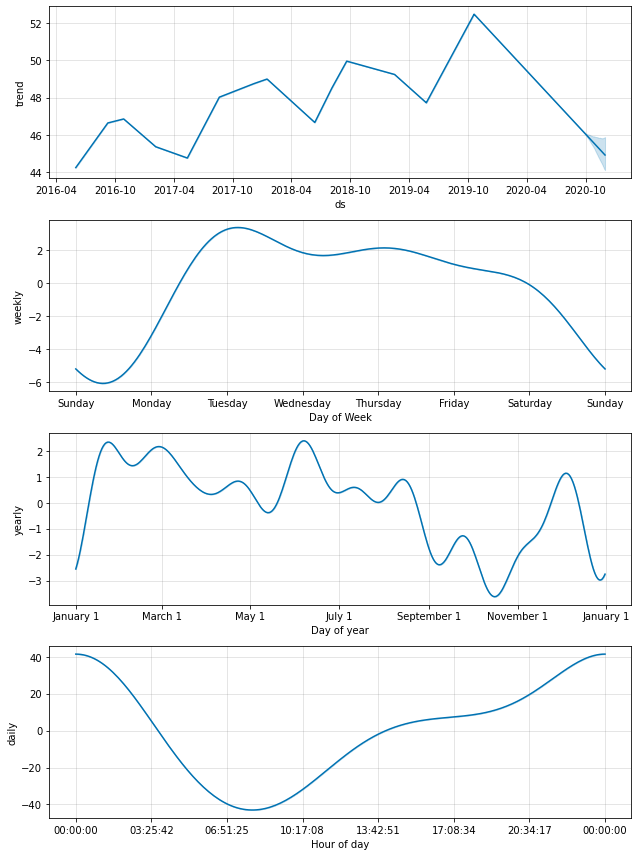

In [49]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 
figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** Overnight, hours 22:00 till approximately 02:00

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** Tuesday

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** The lowest point of the year for search traffic is approximately the start of October


## Step 5 (Optional): Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

1. Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data. The daily sales figures are quoted in millions of USD dollars.

2. Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

3. Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.




#### Step 1: Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

In [ ]:
# Set path of daily revenue CSV data into revenue dataframe
# Set the "date" column as the DatetimeIndex
# Sales are quoted in millions of US dollars
daily_revenue_csv_path = Path("../Resources/mercado_daily_revenue.csv")
df_mercado_sales = # YOUR CODE HERE

# Review the DataFrame
# YOUR CODE HERE


In [ ]:

# Use hvPlot to visualize the daily sales figures 
# YOUR CODE HERE


In [ ]:
# Apply a Facebook Prophet model to the data.

# Set up the dataframe in the neccessary format:
# Reset the index so that date becomes a column in the DataFrame
mercado_sales_prophet_df = # YOUR CODE HERE

# Adjust the columns names to the Prophet syntax
mercado_sales_prophet_df.columns = # YOUR CODE HERE

# Visualize the DataFrame
# YOUR CODE HERE


In [ ]:
# Create the model
mercado_sales_prophet_model = # YOUR CODE HERE

# Fit the model
# YOUR CODE HERE


In [ ]:
# Predict sales for 90 days (1 quarter) out into the future.

# Start by making a future dataframe
mercado_sales_prophet_future = # YOUR CODE HERE

# Display the last five rows of the future DataFrame
# YOUR CODE HERE


In [ ]:
# Make predictions for the sales each day over the next quarter
mercado_sales_prophet_forecast = # YOUR CODE HERE

# Display the first 5 rows of the resulting DataFrame
# YOUR CODE HERE


#### Step 2: Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

In [ ]:
# Use the plot_components function to analyze seasonal patterns in the company's revenue
# YOUR CODE HERE


##### Answer the following question:

**Question:** For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

**Answer:** # YOUR ANSWER HERE

#### Step 3: Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.

In [ ]:
# Plot the predictions for the Mercado sales
# YOUR CODE HERE


In [ ]:
# For the mercado_sales_prophet_forecast DataFrame, set the ds column as the DataFrame Index
mercado_sales_prophet_forecast = # YOUR CODE HERE

# Display the first and last five rows of the DataFrame
# YOUR CODE HERE


In [ ]:
# Produce a sales forecast for the finance division
# giving them a number for expected total sales next quarter.
# Provide best case (yhat_upper), worst case (yhat_lower), and most likely (yhat) scenarios.

# Create a forecast_quarter Dataframe for the period 2020-07-01 to 2020-09-30
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
mercado_sales_forecast_quarter = # YOUR CODE HERE

# Update the column names for the forecast_quarter DataFrame
# to match what the finance division is looking for 
mercado_sales_forecast_quarter = # YOUR CODE HERE

# Review the last five rows of the DataFrame
# YOUR CODE HERE


In [ ]:
# Displayed the summed values for all the rows in the forecast_quarter DataFrame
# YOUR CODE HERE


### Based on the forecast information generated above, produce a sales forecast for the finance division, giving them a number for expected total sales next quarter. Include best and worst case scenarios, to better help the finance team plan.

**Answer:** # YOUR ANSWER HERE